## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in this jupyter notebook. Some of the early preprocessing steps have been done for you already.

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. 



# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

**Answer :** Predicting student transfers is a classification problem where the goal is to determine if a student will stay enrolled or transfer to another institution. Features like academic performance (GPA, grades), demographics (age, location), engagement (attendance, extracurriculars), satisfaction levels, and financial status can be used to train models like Logistic Regression or Random Forests. This helps institutions identify at-risk students and implement strategies to improve retention.

# 2. Preprocessing

In [66]:
# Importing all the modules you will need, and then some. This may take some time.
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.dummy import DummyClassifier
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import mean
print ("done")

%matplotlib inline

done


In our class we covered multiple classification methods. In this part of the home work you can compare them 

* Find an interesting dataset.
* You may use the "auto_imports.csv" dataset discussed in class.
* You may also use the "pubg_dataset- Sheet.csv" discussed in class.
* You may also use a dataset that you find elsewhere.
* Bonus points: Find a dataset that is relevant to your answer in question 1.

In [67]:
#Read in data - auto_imports provided as model.
df =pd.read_csv('auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 2.1 Perform some basic EDA on your data.

In [68]:
# Perform some basic EDA on your data. (more than just the info() shown here.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    object 
 11  stroke       201 non-null    object 
 12  comprassion  201 non-null    float64
 13  horse_power  201 non-null    object 
 14  peak_rpm     201 non-null    object 
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(5), int64(5), object(8)
memory usage: 2

In [69]:
df.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,comprassion,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [70]:
df.dtypes

fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object

In [71]:
df.isnull().sum()

fuel_type      0
body           0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_type    0
cylinders      0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

In [72]:
correlationMatrix = df.drop(df.select_dtypes(include=['object']).columns, axis=1).corr()
correlationMatrix

,wheel_base,length,width,heights,curb_weight,engine_size,comprassion,city_mpg,highway_mpg,price
wheel_base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.250313,-0.470606,-0.543304,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.159733,-0.665192,-0.698142,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.189867,-0.633531,-0.680635,0.751265
heights,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.259737,-0.049800,-0.104812,0.135486
curb_weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.156433,-0.749543,-0.794889,0.834415
engine_size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.028889,-0.650546,-0.679571,0.872335
comprassion,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,1.000000,0.331425,0.268465,0.071107
city_mpg,-0.470606,-0.665192,-0.633531,-0.049800,-0.749543,-0.650546,0.331425,1.000000,0.972044,-0.686571
highway_mpg,-0.543304,-0.698142,-0.680635,-0.104812,-0.794889,-0.679571,0.268465,0.972044,1.000000,-0.704692
price,0.584642,0.690628,0.751265,0.135486,0.834415,0.872335,0.071107,-0.686571,-0.704692,1.000000


In [73]:
# import matplotlib.pyplot as plt
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

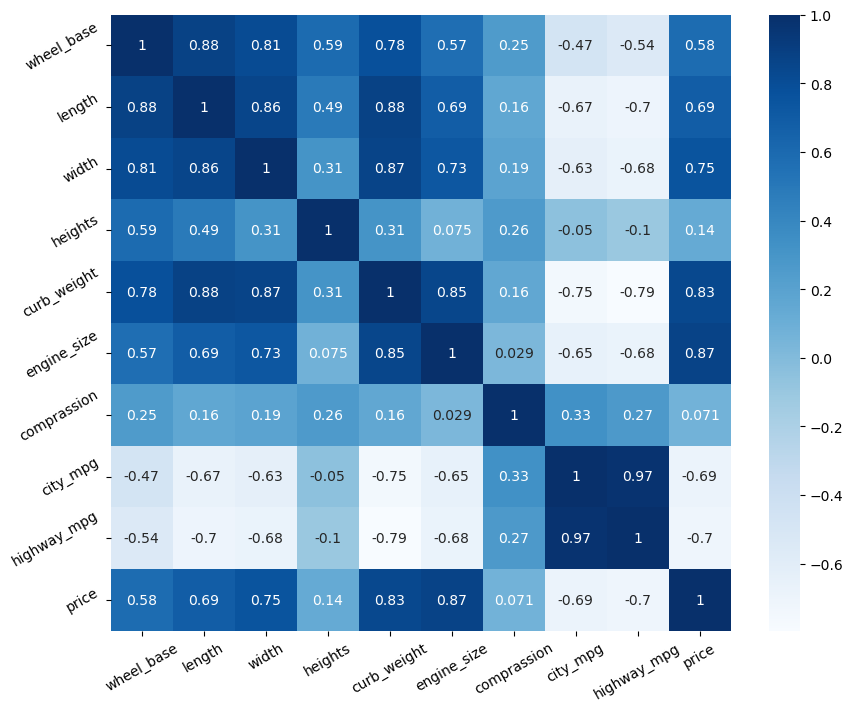

In [74]:
# Heat map
fig = plt.figure(figsize=(10,8))
sns.heatmap(correlationMatrix, annot=True, cmap=plt.colormaps()[8])
plt.xticks(rotation = 30);
plt.yticks(rotation = 30);

### Visualizing the Number Columns 

In [75]:
columnList_numerical = df.select_dtypes(include=['number']).columns
columnList_numerical

Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'comprassion', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

### Lets first see the Distribution of the data within each numeric feature

In [76]:
# Dataframe having only numerical datatype
df_numerical = df.select_dtypes(include=['number'])

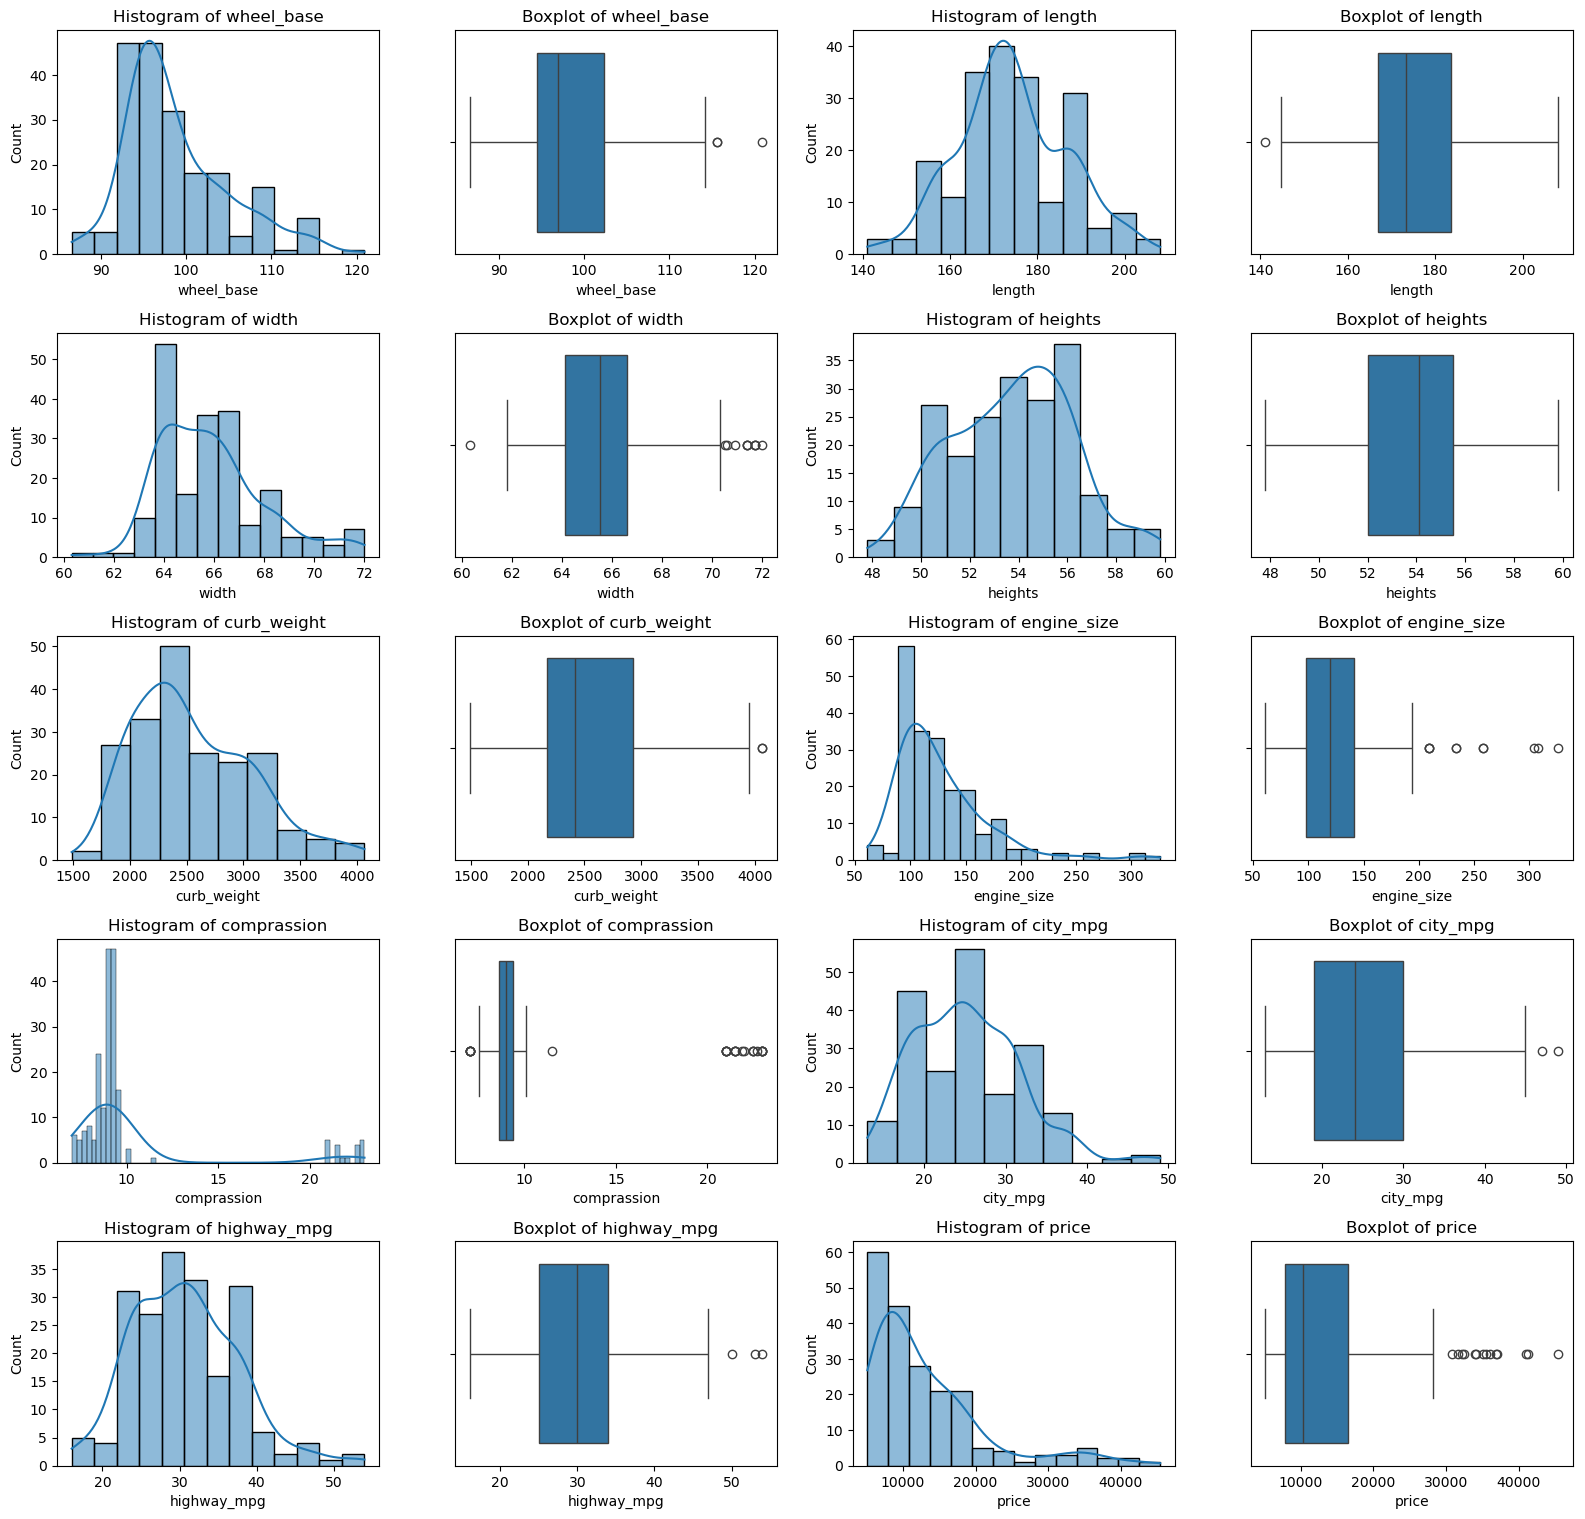

In [77]:
# Number of rows and columns (doubled to fit histplot and boxplot side by side)
ncols = 4 
nrows = len(columnList_numerical)

fig , ax = plt.subplots(nrows,ncols, figsize=(ncols *4, nrows * 3)) #dynamically providing the figsize
ax = ax.flatten()

for i, col in enumerate(columnList_numerical):
    ax_index_hist = i * 2  # Histogram index
    ax_index_box = i * 2 + 1  # Boxplot index
    sns.histplot(data= df_numerical, x=col, kde=True, ax=ax[ax_index_hist])
    ax[ax_index_hist].set_title(f'Histogram of {col}')  # Title for histogram
    ax[ax_index_hist].set_xlabel(col)

    sns.boxplot(data=df_numerical, x=col, ax=ax[ax_index_box])
    ax[ax_index_box].set_title(f'Boxplot of {col}')  # Title for boxplot
    ax[ax_index_box].set_xlabel(col)  # X-axis label

# Hide unused subplots if there are extra axes
for j in range(len(columnList_numerical)*2, len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.show()

**Now Lets do the statistical test for determing the distribution of the features**

In [153]:
from scipy import stats

# Example function to identify nature of distribution
distributionList = ['norm', 'uniform', 'expon']
def analyze_distribution(data, col, ele):
    ks_statistic, p_value = stats.kstest(data[col], ele)  
    if p_value > 0.05:
        return f"{col}: Likely {ele} Distribution (p={p_value:.3f})"
    else:
        return f"{col}: Not {ele} (p={p_value:.3f})"
for ele in distributionList:
    print(f"For distribution {ele} :")
    for col in df.select_dtypes(include='number').columns:        
        print(analyze_distribution(df, col, ele))


For distribution norm :
wheel_base: Not norm (p=0.000)
length: Not norm (p=0.000)
width: Not norm (p=0.000)
heights: Not norm (p=0.000)
curb_weight: Not norm (p=0.000)
engine_size: Not norm (p=0.000)
bore: Not norm (p=0.000)
stroke: Not norm (p=0.000)
comprassion: Not norm (p=0.000)
horse_power: Not norm (p=0.000)
peak_rpm: Not norm (p=0.000)
city_mpg: Not norm (p=0.000)
highway_mpg: Not norm (p=0.000)
price: Not norm (p=0.000)
For distribution uniform :
wheel_base: Not uniform (p=0.000)
length: Not uniform (p=0.000)
width: Not uniform (p=0.000)
heights: Not uniform (p=0.000)
curb_weight: Not uniform (p=0.000)
engine_size: Not uniform (p=0.000)
bore: Not uniform (p=0.000)
stroke: Not uniform (p=0.000)
comprassion: Not uniform (p=0.000)
horse_power: Not uniform (p=0.000)
peak_rpm: Not uniform (p=0.000)
city_mpg: Not uniform (p=0.000)
highway_mpg: Not uniform (p=0.000)
price: Not uniform (p=0.000)
For distribution expon :
wheel_base: Not expon (p=0.000)
length: Not expon (p=0.000)
width:

In [149]:
import pandas as pd
from scipy import stats

# Example distributions
distribution_list = ['norm', 'uniform', 'expon']

# Function to analyze distribution
def analyze_distribution(data, col, dist):
    ks_statistic, p_value = stats.kstest(data[col], dist)
    return {"Column": col, "Distribution": dist, "KS Statistic": ks_statistic, "P-Value": p_value}

# Collect results
results = []
for dist in distribution_list:
    for col in df.select_dtypes(include='number').columns:
        results.append(analyze_distribution(df, col, dist))

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Display the results sorted by P-Value for easier interpretation
# print(results_df.sort_values(by="P-Value", ascending=False))
results_df.head(5)


,Column,Distribution,KS Statistic,P-Value
0,wheel_base,norm,1.0,0.0
1,length,norm,1.0,0.0
2,width,norm,1.0,0.0
3,heights,norm,1.0,0.0
4,curb_weight,norm,1.0,0.0


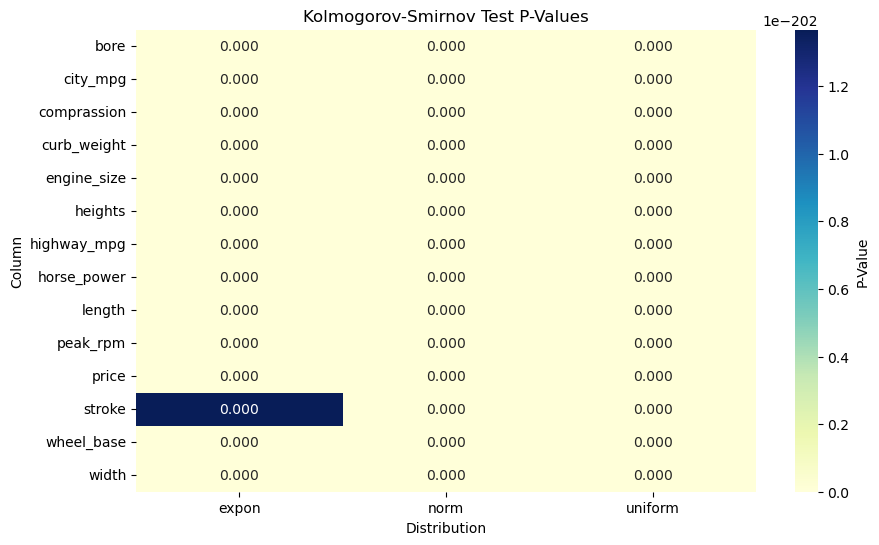

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table for heatmap (Columns vs Distributions)
heatmap_data = results_df.pivot(index="Column", columns="Distribution", values="P-Value")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f", cbar_kws={'label': 'P-Value'})
plt.title("Kolmogorov-Smirnov Test P-Values")
plt.ylabel("Column")
plt.xlabel("Distribution")
plt.show()


### Visualizing the Categorical Columns 

In [79]:
columnList_string = df.select_dtypes(include=['object']).columns
columnList_string

# Dataframe having only object datatype
df_string = df.select_dtypes(include=['object'])

In [80]:
df_string.head(5)

,fuel_type,body,engine_type,cylinders,bore,stroke,horse_power,peak_rpm
0,gas,convertible,dohc,four,3.47,2.68,111,5000
1,gas,convertible,dohc,four,3.47,2.68,111,5000
2,gas,hatchback,ohcv,six,2.68,3.47,154,5000
3,gas,sedan,ohc,four,3.19,3.4,102,5500
4,gas,sedan,ohc,five,3.19,3.4,115,5500


**The above dataframe shows that come of the columns are numerical in nature but datatype is shown as string/object.**

In [81]:
df_string['engine_type'].value_counts()

engine_type
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: count, dtype: int64

fuel_type, 	body,	wheel_base,	length,	width,	heights,	curb_weight,	engine_type,	cylinders,	engine_size,	bore,	stroke,	comprassion,	horse_power,	peak_rpm,	city_mpg,	highway_mpg	price

**Melting some columns to cumpute new dimensions for visualization**

In [82]:
df_melted_mpg = df.melt(id_vars='body', value_vars=['city_mpg', 'highway_mpg'], 
                    var_name='Mileage_Type', value_name='MPG')
df_melted_inches = df.melt(id_vars='body', value_vars=['length', 'width', 'heights'], 
                    var_name='dimension', value_name='inches')

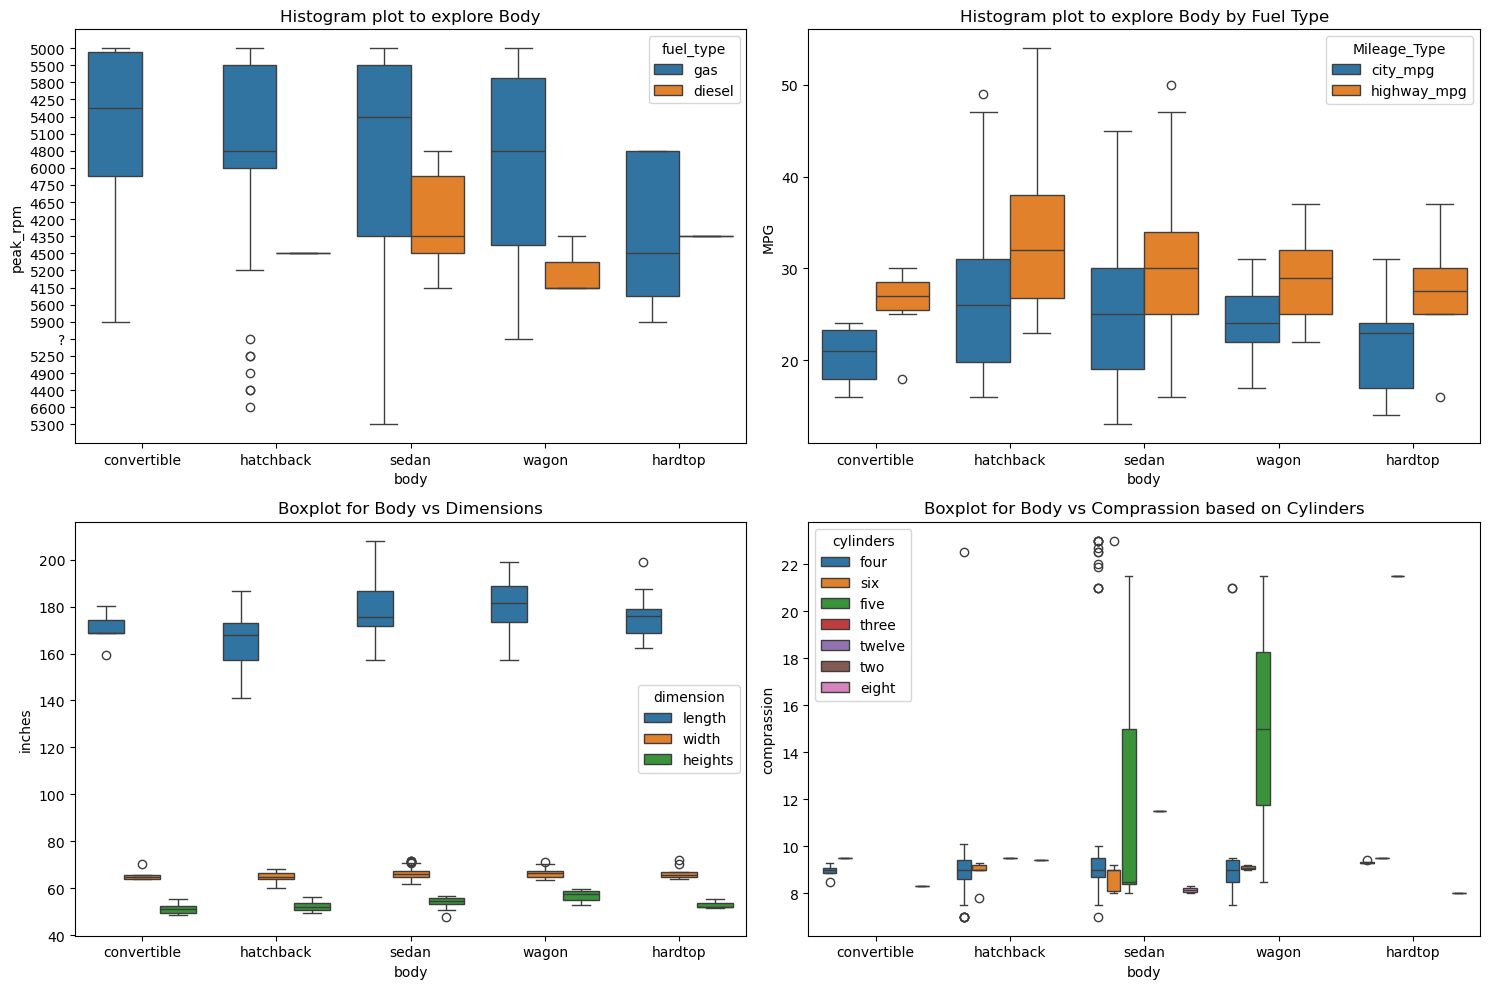

In [83]:
fig, axs= plt.subplots(2, 2, figsize= (15, 10))
sns.boxplot(data= df, x= "body", y='peak_rpm',hue='fuel_type', legend= True, ax= axs[0, 0])
axs[0, 0].set_title("Histogram plot to explore Body")
sns.boxplot(data=df_melted_mpg, x='body', y='MPG', hue='Mileage_Type', ax=axs[0, 1])
axs[0, 1].set_title("Histogram plot to explore Body by Fuel Type")

sns.boxplot(data=df_melted_inches, x='body', y='inches', hue='dimension', ax= axs[1, 0])
axs[1, 0].set_title("Boxplot for Body vs Dimensions")
sns.boxplot(data= df, x= "body", y='comprassion', hue='cylinders', gap=0.1, ax= axs[1, 1])
axs[1, 1].set_title("Boxplot for Body vs Comprassion based on Cylinders")

plt.tight_layout()
plt.show()


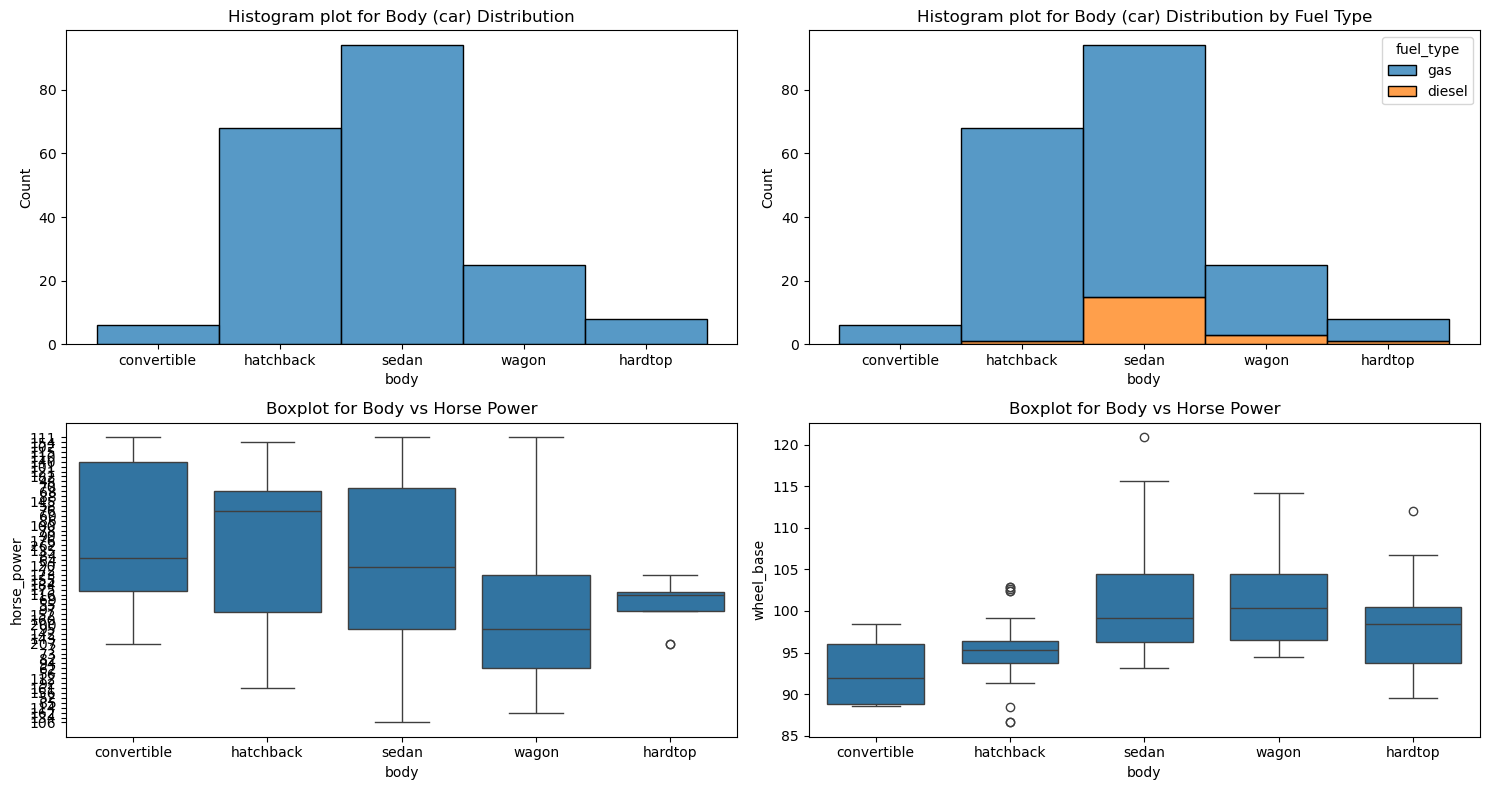

In [84]:
fig, axs= plt.subplots(2, 2, figsize= (15, 8))
sns.histplot(data= df, x= "body", bins= 10, legend= True, ax= axs[0, 0])
axs[0, 0].set_title("Histogram plot for Body (car) Distribution")
sns.histplot(data= df, x= "body", bins= 10, hue= "fuel_type", legend= True,  multiple="stack", ax= axs[0, 1])
axs[0, 1].set_title("Histogram plot for Body (car) Distribution by Fuel Type")

sns.boxplot(data= df, x= "body", y='horse_power', ax= axs[1, 0])
axs[1, 0].set_title("Boxplot for Body vs Horse Power")
sns.boxplot(data= df, x= "body", y='wheel_base', gap=0.1, ax= axs[1, 1])
axs[1, 1].set_title("Boxplot for Body vs Horse Power")

plt.tight_layout()
plt.show()


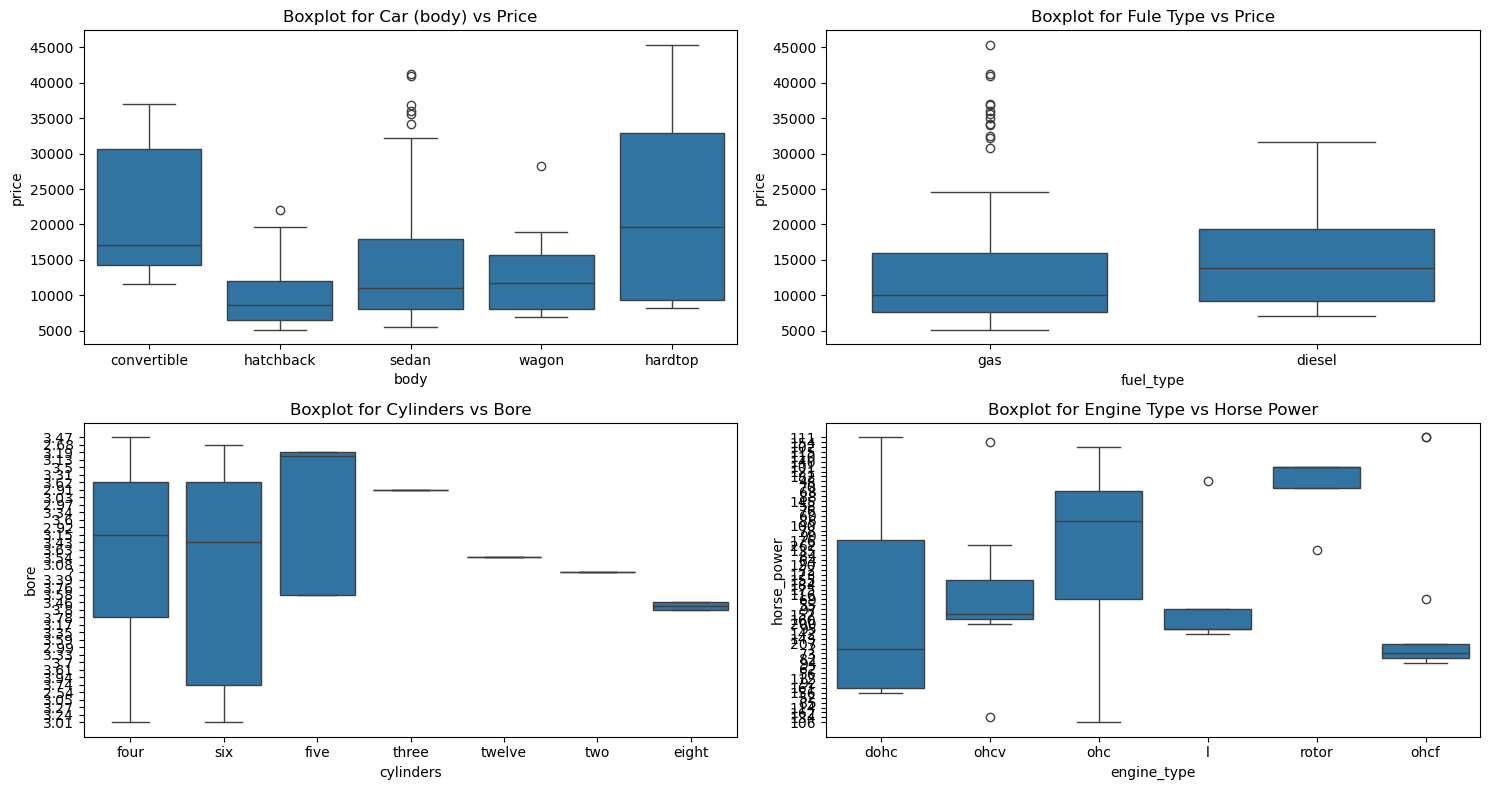

In [85]:
fig, axs= plt.subplots(2, 2, figsize= (15, 8))

sns.boxplot(data= df, x= "body", y='price',  ax= axs[0,0])
axs[0, 0].set_title("Boxplot for Car (body) vs Price")
sns.boxplot(data= df, x= "fuel_type", y='price', gap=0.1, ax= axs[0, 1])
axs[0, 1].set_title("Boxplot for Fule Type vs Price")

sns.boxplot(data= df, x= "cylinders", y='bore', ax= axs[1, 0])
axs[1, 0].set_title("Boxplot for Cylinders vs Bore")
sns.boxplot(data=df, x="engine_type", y="horse_power", ax=axs[1, 1])
axs[1, 1].set_title("Boxplot for Engine Type vs Horse Power")

plt.tight_layout()
plt.show()


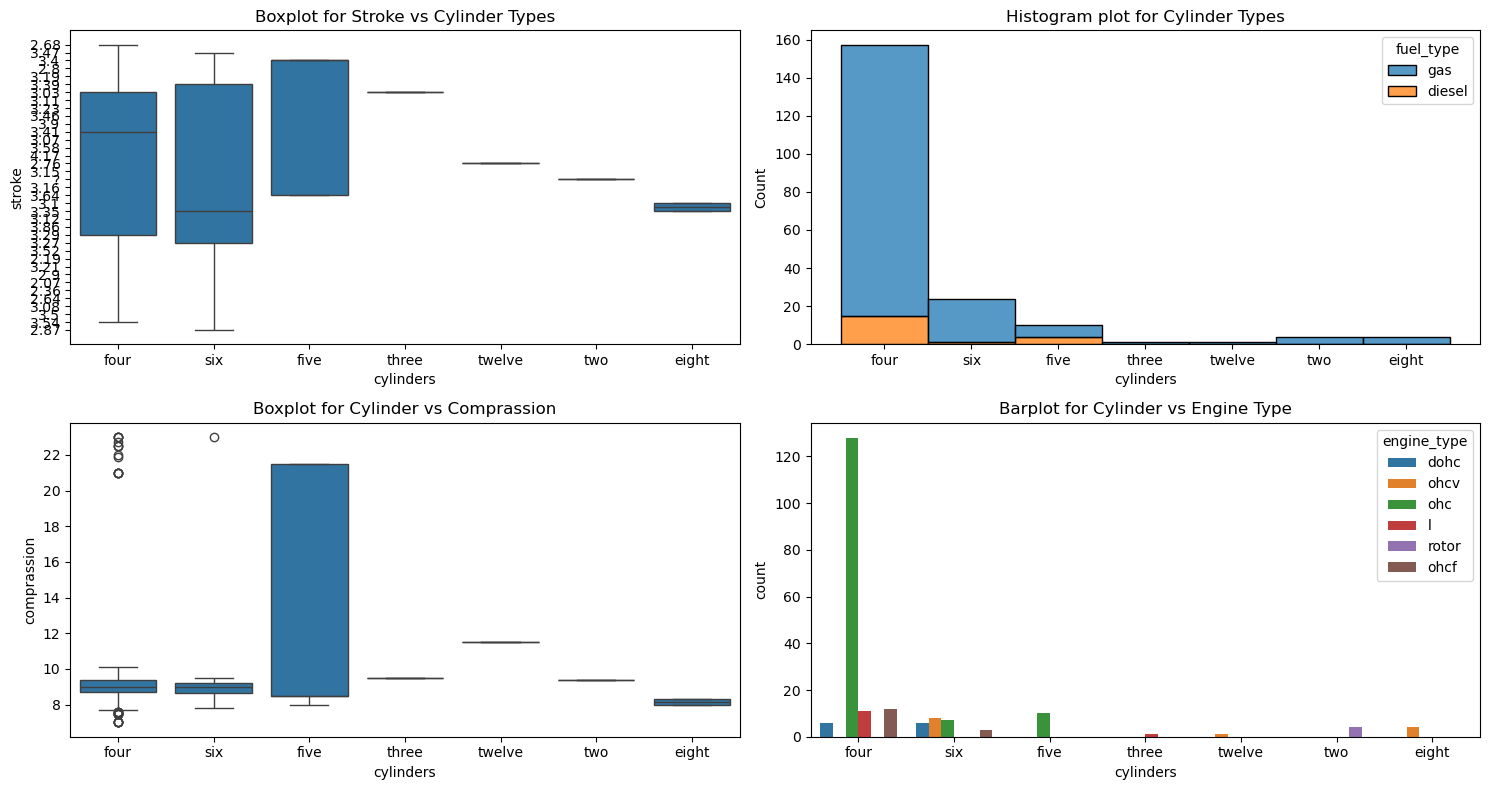

In [86]:
fig, axs= plt.subplots(2, 2, figsize= (15, 8))
sns.boxplot(data= df, x= "cylinders", y='stroke', legend= True, ax= axs[0, 0])
axs[0, 0].set_title("Boxplot for Stroke vs Cylinder Types")
sns.histplot(data= df, x= "cylinders", bins= 10, hue= "fuel_type", legend= True,  multiple="stack", ax= axs[0, 1])
axs[0, 1].set_title("Histogram plot for Cylinder Types")

sns.boxplot(data= df, x= "cylinders", y='comprassion',  ax= axs[1, 0])
axs[1, 0].set_title("Boxplot for Cylinder vs Comprassion")
sns.countplot(data=df, x='cylinders', hue='engine_type', ax= axs[1, 1])
axs[1, 1].set_title("Barplot for Cylinder vs Engine Type")

plt.tight_layout()
plt.show()


## 2.2 Wrangle the data into shape.

### Looks Like some numerical column are shown as object/string type Converting such columns into numerical column

In [87]:
df[['bore', 'stroke', 'horse_power', 'peak_rpm']].value_counts()

bore  stroke  horse_power  peak_rpm
2.97  3.23    68           5500        12
3.15  3.29    69           5200         9
3.19  3.03    70           4800         7
3.62  3.5     116          4800         6
3.78  3.15    114          5400         6
                                       ..
2.68  3.47    154          5000         1
3.43  3.23    90           5000         1
      3.27    200          5200         1
      3.64    72           4200         1
?     ?       135          6000         1
Name: count, Length: 84, dtype: int64

**The above value counts shows that there is a value questionmark (?) which seems a random value. Replace such value.**

In [88]:
###replace question marks with "None" values.
# Replace '?' with NaN
df[['bore', 'stroke', 'horse_power', 'peak_rpm']] = df[['bore', 'stroke', 'horse_power', 'peak_rpm']].replace('?', np.nan)

In [89]:
# drop the NaN values
df.dropna(inplace=True)

In [90]:
### Change the variables: bore, stroke, horse_power, peak_rpm to float64
df[['bore', 'stroke', 'horse_power', 'peak_rpm']] = df[['bore', 'stroke', 'horse_power', 'peak_rpm']].astype('float64')


In [91]:
# checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    object 
 1   body         195 non-null    object 
 2   wheel_base   195 non-null    float64
 3   length       195 non-null    float64
 4   width        195 non-null    float64
 5   heights      195 non-null    float64
 6   curb_weight  195 non-null    int64  
 7   engine_type  195 non-null    object 
 8   cylinders    195 non-null    object 
 9   engine_size  195 non-null    int64  
 10  bore         195 non-null    float64
 11  stroke       195 non-null    float64
 12  comprassion  195 non-null    float64
 13  horse_power  195 non-null    float64
 14  peak_rpm     195 non-null    float64
 15  city_mpg     195 non-null    int64  
 16  highway_mpg  195 non-null    int64  
 17  price        195 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 28.9+ 

In [92]:
## Drop body,engine_type, and cylinders
df2=df.drop(['body','engine_type','cylinders'], axis=1).copy()

In [93]:
# Confirm data is cleaned up.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    object 
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    float64
 11  peak_rpm     195 non-null    float64
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 24.4+ KB


## 2.3 Perform additional data wrangling to prepare the data for classicifation. For instance, in the auto_imports
* Change ['gas', 'diesel'] string values to [0, 1] integer values.
* Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables
* Split your data into training and testing set. Use test_size=0.3, random_state=746 

**Lets split the dataset into dependent and independent dataset**

In [94]:
X_df = df2.drop(['fuel_type'], axis = 1).copy()
y_df = df2['fuel_type'].map({'gas':0, 'diesel':1}).copy()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=746)

In [96]:
X_train.shape , X_test.shape

((136, 14), (59, 14))

**Feature Scaling**

In [97]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [98]:
model_logReg = LogisticRegression()
model_logReg.fit(X_train_scaled, y_train)

LogisticRegression()

In [99]:
y_predict_logReg = model_logReg.predict(X_test_scaled)

In [100]:
y_predict_logReg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [101]:
confusionMatrix = confusion_matrix(y_true=y_test, y_pred=y_predict_logReg)
print(f"Confusion Matrix for Logistic Regression : \n", confusionMatrix )

classificationReport = classification_report(y_true=y_test, y_pred= y_predict_logReg)
print(f"Confusion Matrix for Logistic Regression : \n", classificationReport )

Confusion Matrix for Logistic Regression : 
 [[50  0]
 [ 0  9]]
Confusion Matrix for Logistic Regression : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



**Computing ROC/AUC**

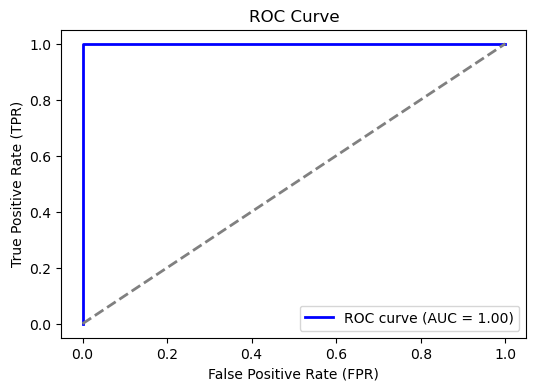

In [102]:
# Get predicted probabilities for the positive class (class '1')
y_prob_auc = model_logReg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_auc)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [103]:
model_nveBys = GaussianNB()
model_nveBys.fit(X_train_scaled, y_train)

GaussianNB()

In [104]:
y_predict_nveBys = model_nveBys.predict(X_test_scaled)

In [105]:
confusionMatrix = confusion_matrix(y_true=y_test, y_pred=y_predict_nveBys)
print(f"Confusion Matrix for Naive Bayes : \n", confusionMatrix )

classificationReport = classification_report(y_true=y_test, y_pred= y_predict_nveBys)
print(f"Confusion Matrix for Naive Bayes : \n", classificationReport )

Confusion Matrix for Naive Bayes : 
 [[50  0]
 [ 0  9]]
Confusion Matrix for Naive Bayes : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



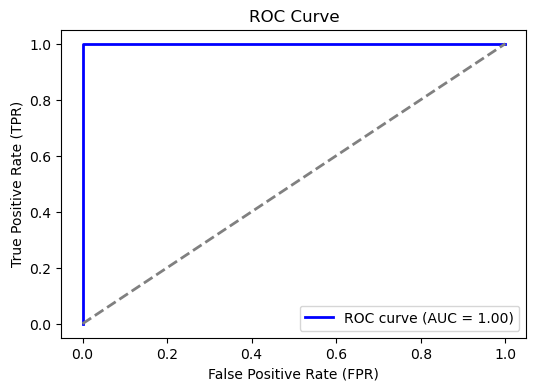

In [106]:
# Get predicted probabilities for the positive class (class '1')
y_prob_nveBys_auc = model_nveBys.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nveBys_auc)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC

**First finding the optimal value of k using Elbow Method** 

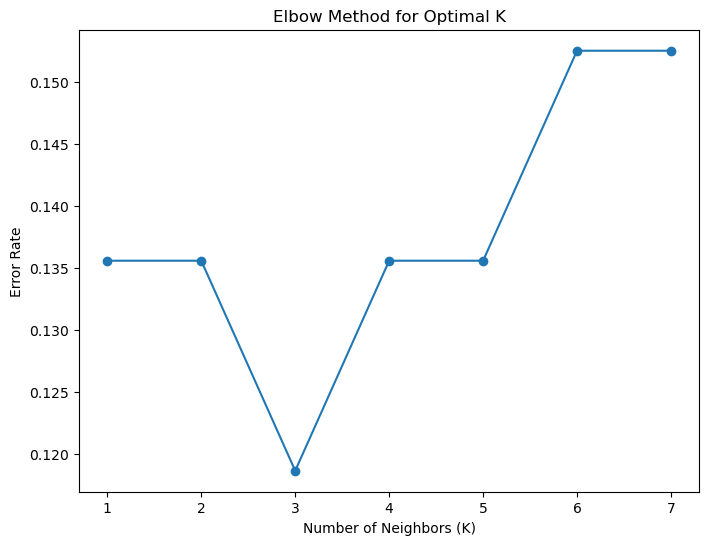

In [136]:
error_rates = []
k_values = range(1, 8)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append((y_pred != y_test).mean())

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.show()


**Using k=3**

In [137]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [133]:
y_predict_knn = model_knn.predict(X_test_scaled)

In [129]:
confusionMatrix = confusion_matrix(y_true=y_test, y_pred=y_predict_knn)
print(f"Confusion Matrix for KNeighborsClassifier : \n", confusionMatrix )

classificationReport = classification_report(y_true=y_test, y_pred= y_predict_knn)
print(f"Confusion Matrix for KNeighborsClassifier : \n", classificationReport )

Confusion Matrix for KNeighborsClassifier : 
 [[50  0]
 [ 0  9]]
Confusion Matrix for KNeighborsClassifier : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



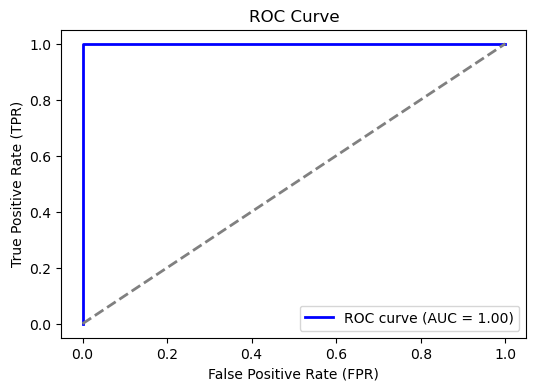

In [112]:
# Get predicted probabilities for the positive class (class '1')
y_prob_knn_auc = model_knn.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn_auc)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

**SVM**

In [113]:

model_svm = SVC(kernel='linear', C=0.1, random_state=746)
model_svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=746)

In [114]:
y_pred_svm = model_svm.predict(X_test)

In [115]:
confusionMatrix = confusion_matrix(y_true=y_test, y_pred=y_pred_svm)
print(f"Confusion Matrix for SVM : \n", confusionMatrix )

classificationReport = classification_report(y_true=y_test, y_pred= y_pred_svm)
print(f"Confusion Matrix for SVM : \n", classificationReport )

Confusion Matrix for SVM : 
 [[50  0]
 [ 0  9]]
Confusion Matrix for SVM : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



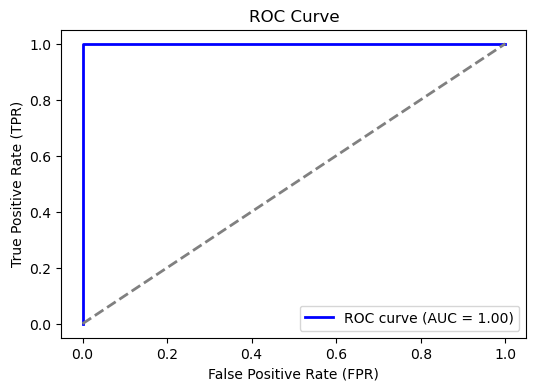

In [116]:
# Get predicted probabilities for the positive class (class '1')
y_prob_svm_auc = model_knn.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm_auc)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 3.5 Compare your results and comment on your findings. 
* Which one(s) did the best job?
* What could have been the problem with the ones that did not work?
* etc.

**Answer** All model performs perfectly with accuracy, precision, recall and f1-score of 1

In [117]:
#your answer
# All model performs perfectly with accuracy, precision, recall and f1-score of 1

## 4. Bonus points
* Is your dataset imbalanced, yes or no?
* If yes, is it badly enough imbalanced that it is wrth fixing?
* (this is the bonus part): Try to fix the imbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferably one that "failed" before) and see if you get better results.

**Answer** Dataset is imbalance based on the target label. Class 0 having 175 records and Class 1 has 20 records. The training set consists of 125 and 11 for Class 0 and Class 1

In [118]:
#your code
y_train.value_counts()

fuel_type
0    125
1     11
Name: count, dtype: int64

**using SMOTE sampling technique**

In [119]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=756)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_smote.value_counts())

Original class distribution: fuel_type
0    125
1     11
Name: count, dtype: int64
Resampled class distribution: fuel_type
1    125
0    125
Name: count, dtype: int64


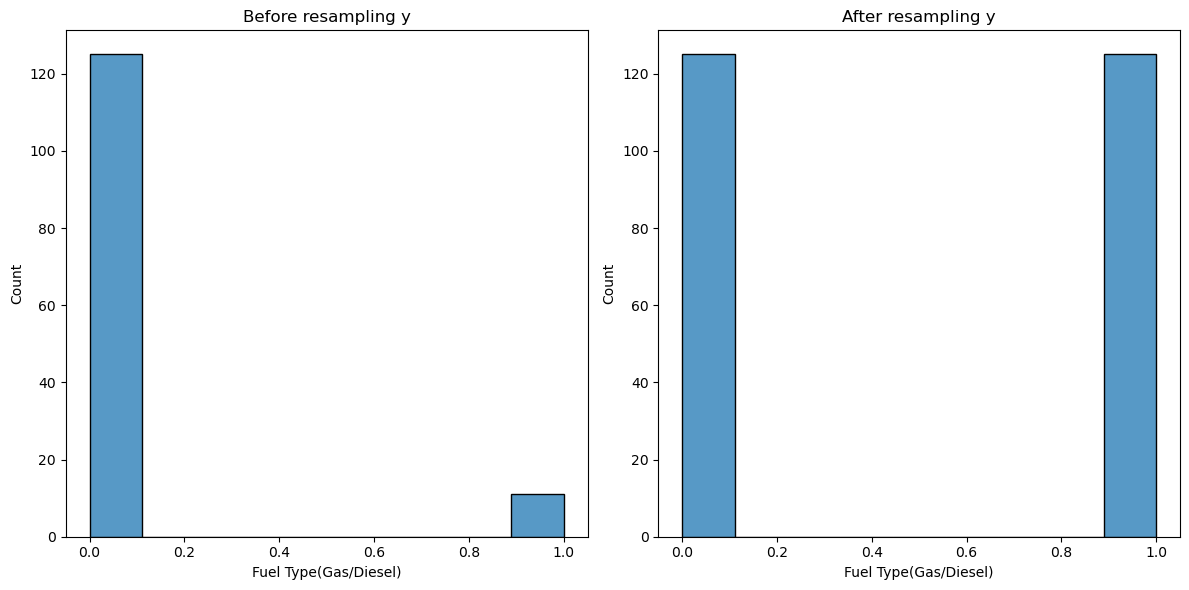

In [120]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram
sns.histplot(y_train, ax=axs[0])
axs[0].set_title("Before resampling y")
axs[0].set_xlabel("Fuel Type(Gas/Diesel)")
axs[0].set_ylabel("Count")

# Plot the second histogram
sns.histplot(y_train_smote, ax=axs[1])
axs[1].set_title("After resampling y")
axs[1].set_xlabel("Fuel Type(Gas/Diesel)")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Using SVM after SMOTE**

In [121]:

model_svm = SVC(kernel='linear', C=0.1, random_state=746)
model_svm.fit(X_train_smote, y_train_smote)

SVC(C=0.1, kernel='linear', random_state=746)

In [122]:
y_pred_svm = model_svm.predict(X_test_scaled)

In [123]:
confusionMatrix = confusion_matrix(y_true=y_test, y_pred=y_pred_svm)
print(f"Confusion Matrix for SVM : \n", confusionMatrix )

classificationReport = classification_report(y_true=y_test, y_pred= y_pred_svm)
print(f"Confusion Matrix for SVM : \n", classificationReport )

Confusion Matrix for SVM : 
 [[50  0]
 [ 0  9]]
Confusion Matrix for SVM : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



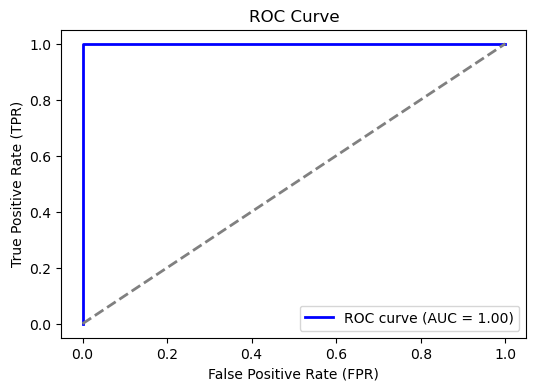

In [124]:
# Get predicted probabilities for the positive class (class '1')
y_prob_svm_smote_auc = model_knn.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm_smote_auc)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Any better results ?**

**Answer:** No, all the results before and after SMOTE sampling is perfect score.